In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['figure.figsize'] = (20.0, 18.0)

In [ ]:
excel_file='../data/test1.xlsx'
df = pd.read_excel(excel_file, 'Sheet1', index_col=None, na_values=['NA'])
df['建筑面积分类']=df['wlc_建筑面积']//200000
df['sunhours_avg']=df['sunhours']/df['wlc_建筑表面积']
df['radiation_avg']=df['radiation']/df['wlc_建筑表面积']

# 可视化数据分布
任何分析或建模数据工作的早期步骤都应该是了解变量的分布方式。分布可视化技术可以为许多重要问题提供快速答案。
观测涵盖什么范围？
他们的核心倾向是什么？
它们是否严重偏向一个方向？
是否有双峰性的证据？
是否存在明显的异常值？
这些问题的答案是否因其他变量定义的子集而异？

## 单变量直方图

In [ ]:
# 单变量直方图binwidth可以设置柱宽，bin可以设置柱子数量
sns.displot(df, x="wlc_建筑面积", bins=20 , height=8)

In [ ]:
sns.displot(df, x="建筑面积分类")

In [ ]:
sns.displot(df, x="建筑面积分类", bins=[0,1, 2, 3,4])

In [ ]:
sns.displot(df, x="建筑面积分类", discrete=True,shrink=.8)

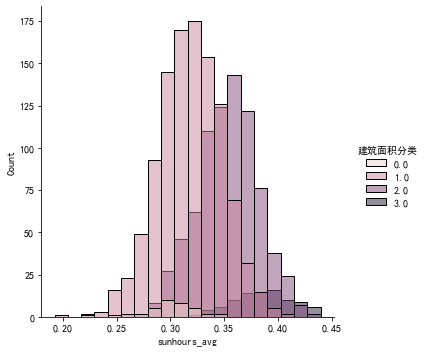

In [6]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", bins=20)
# sns.displot(df, x="sunhours_avg", hue="建筑面积分类", element="step", bins=20)

In [ ]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", multiple="stack")

In [ ]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", multiple="dodge")

### 归一化直方图统计
当子集具有不等数的观测值时，比较它们在计数方面的分布可能并不理想。

一种解决方案是使用stat参数归一化计数，例如密度归一化：

密度 = count / (sum(counts) *binwidth)）
直方图的面积积分为 1 (即，sum(密度 * binwidth) == 1)。

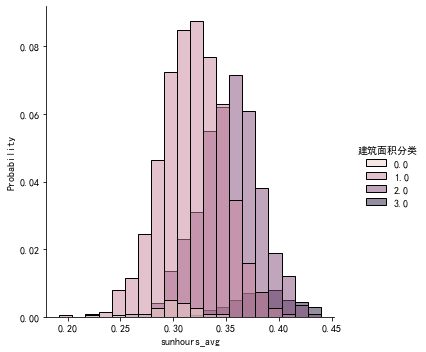

In [10]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", stat="density", bins=20)

但是默认情况下，归一化应用于整个分布，只会重新缩放柱线的高度。
通过设置common_norm=False，每个子集将独立归一化：

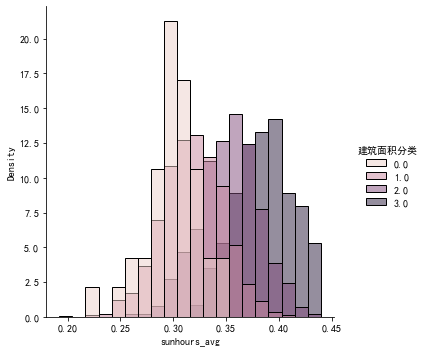

In [9]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类",common_norm=False, stat="density", bins=20)

另一种选择是使用概率归一化，使直方图高度之和为1。
在变量是离散的时这种做法最有意义，但所有直方图都可以用概率归一化：

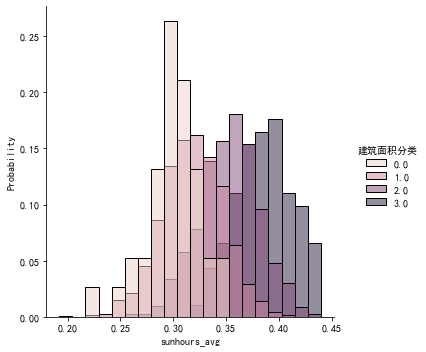

In [11]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", common_norm=False,stat="probability", bins=20)

## 核密度估计

直方图旨在通过对观测值进行分箱和计数来近似生成数据的基础概率密度函数。核密度估计（KDE）为同一问题提供了不同的解决方案。KDE 图不是使用离散的箱子，而是使用高斯核平滑观测值，从而生成**连续**的密度估计值：

In [ ]:
sns.displot(df, x="sunhours_avg", kind="kde")

In [ ]:
sns.displot(df, x="sunhours_avg", kind="kde", bw_adjust=.25)

In [ ]:
sns.displot(df, x="sunhours_avg",hue="建筑面积分类", kind="kde", fill=True)

直方图，kde联合使用

In [ ]:
sns.displot(df, x="sunhours_avg", kde=True)

### 经验累积分布
可视化分布的第三个选项计算"经验累积分布函数"（ECDF）。此图通过每个数据点绘制一条单调递增的曲线，以便曲线的高度反映具有较小值的观测值的比例。ECDF 图有两个关键优势。与直方图或KDE不同，它直接表示每个数据点。这意味着没有要考虑的箱子大小或平滑参数。此外，由于曲线呈单调递增，因此非常适合比较多个分布。

In [ ]:
sns.displot(df, x="sunhours_avg",hue="建筑面积分类", kind="ecdf")

## 可视化二元分布

In [ ]:
sns.displot(df, x="sunhours_avg",y="radiation_avg")

In [ ]:
sns.displot(df, x="sunhours_avg",y="radiation_avg", kind="kde")

In [ ]:
sns.displot(df, x="sunhours_avg",y="radiation_avg",hue="建筑面积分类")

In [ ]:
sns.displot(df, x="sunhours_avg",y="radiation_avg",hue="建筑面积分类", kind="kde")

In [ ]:
# 离散
sns.displot(df, x="建筑面积分类",y="wlc_平均层数",discrete=True)

## 绘制联合分布和边际分布

In [ ]:
sns.jointplot(data=df, x="sunhours_avg", y="radiation_avg")


In [ ]:
sns.jointplot(data=df, x="sunhours_avg", y="radiation_avg",hue="建筑面积分类",kind="kde")

In [ ]:
g=sns.JointGrid(data=df, x="sunhours_avg", y="radiation_avg",hue="建筑面积分类")
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.boxplot)

In [ ]:
df_ana=df.loc[:,["sunhours_avg","radiation_avg","wlc_占地面积","wlc_建筑面积","wlc_平均层数","wlc_建筑体积系数"]]
sns.pairplot(df_ana)

In [ ]:
g = sns.PairGrid(df_ana)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)